<a href="https://colab.research.google.com/github/Aleksypruszkowski/Machine-Learning-MIMUW/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Unsupervised Learning: Clustering


### Author: Aleksy Pruszkowski


#### Using the same code as in class we generate a mouse dataset

In [4]:
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)
data_X = np.vstack([data1, data2, data3])

#### To visualise the decision boundaries we create a grid and then assign each point to a class with highest posterior probability

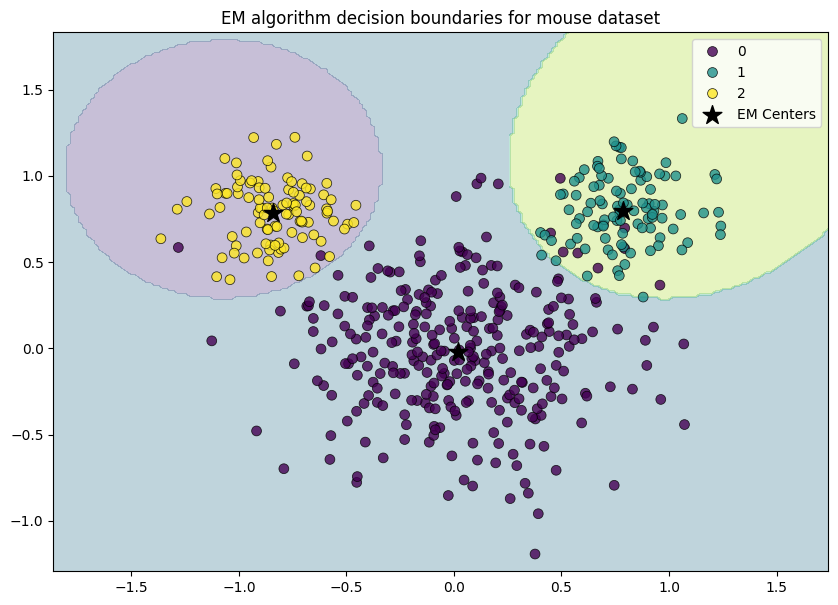

In [15]:
y = list(np.repeat(0,300))+list(np.repeat(1,100))+list(np.repeat(2,100))
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=4)
gmm.fit(data_X)
x_min, x_max = data_X[:, 0].min() - 0.5, data_X[:, 0].max() + 0.5
y_min, y_max = data_X[:, 1].min() - 0.1, data_X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]
responsibilities = gmm.predict_proba(grid_points)
cluster_assignments = np.argmax(responsibilities, axis=1)
Z = cluster_assignments.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, levels=3, alpha=0.3, cmap='viridis')
sns.scatterplot(x=data_X[:, 0], y=data_X[:, 1], hue=y, palette='viridis', edgecolor='k', s=50, alpha=0.8)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', marker='*', s=200, label='EM Centers')
plt.title("EM algorithm decision boundaries for mouse dataset")
plt.legend()
plt.show()

## Determining the number of clusters

#### We generate a new gaussian mix dataset with more number of clusters than before (in tis case there are 5 clusters)

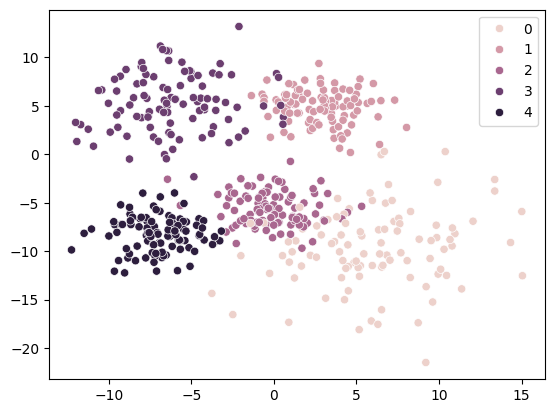

In [7]:
np.random.seed(10)
n_samples = 500
X, y = make_blobs(n_samples=n_samples, centers=5, cluster_std=[4, 2, 2, 3, 2], random_state=10)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

## We will examine two ways of choosing the number of clusters

### 1. Silhouette score

#### We're looking for the number of clusters with the highest silhouette score

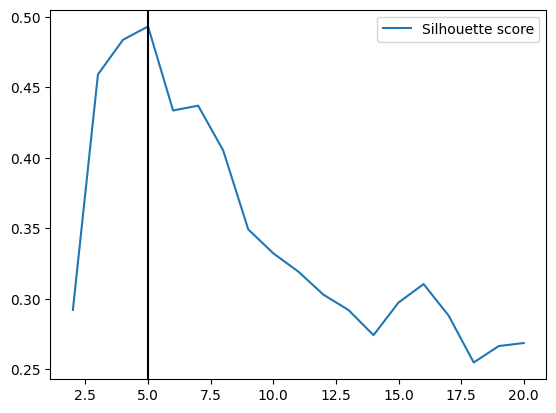

In [8]:
from sklearn.metrics import silhouette_score
# silhouette_score(X,gmm.fit_predict(X))
n = 20
sil = np.zeros(n-1)
for i in range(0,n-1):
  gmm = GaussianMixture(n_components=i+2, covariance_type='full', random_state=4)
  gmm.fit(X)
  sil[i] = silhouette_score(X,gmm.fit_predict(X))
plt.plot(list(range(2,n+1)), sil, label='Silhouette score')
plt.legend()
plt.axvline(x = 5, color = 'black')
plt.show()

### 2. Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

#### We are looking for the number of clusters which minimizes AIC and BIC

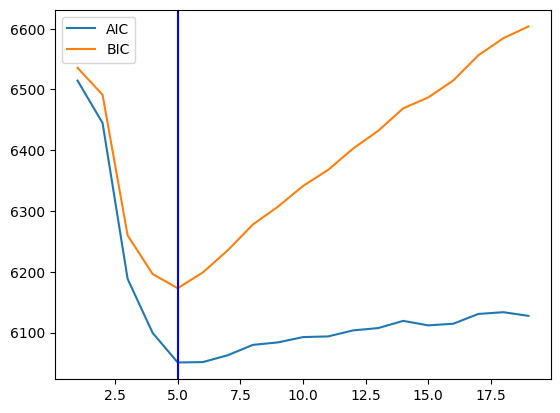

In [9]:
n = 20
aic = np.zeros(n-1)
bic = np.zeros(n-1)
for i in range(0,n-1):
  gmm = GaussianMixture(n_components=i+1, covariance_type='full', random_state=4)
  gmm.fit(X)
  aic[i] = gmm.aic(X)
  bic[i] = gmm.bic(X)
plt.plot(np.arange(1, n), aic, label='AIC')
plt.plot(np.arange(1, n), bic, label='BIC')
plt.legend()
plt.axvline(x = 5, color = 'b')
plt.show()